# Lab 4 - Integration Exercises 

### Grading: 
We will be doing the cyclic grading cycle for this assignment.  See the complete syllabus - posted on Moodle - some detailed notes on grading and correcting your work.

Do your work in this file, so it is easy for me to find/grade.  However, there are good reasons to use multiple files in traditional coding projects, so if you have a good reason to want to make a new file, please talk to me about how to make that work.

#### Version-0: 
Switch back to the Version-0 branch in labs to do this work.  Before you leave lab today, commit your changes to GitHub, and open a pull request, comparing your forked Version-0 branch back to my original repository.  That's all.

#### Version-1: 
By Monday 5:00pm, clean up any unfinished details.  
   * Every code should be well documented with comments.
   * __Every function should have a docstring.__
   * Every graph should be well labeled.  If there is more than one data set or curve, add a legend.
   * Describe each graph with a short paragraph.  What is data plotted, why is it interesting, what model fits that data, is this the model you expect?  Give a written scientific description in complete sentences.  Feel free to modify these prompts to suit the particular graph.
   * Open a pull request on GitHub comparing your forked Version-1 branch back to my original repository.

#### Version-2*: 
After class on Monday, I will post my solution.  
   * Compare our solutions, and look for places you could improve your work 
     * Are your calculations correct?
     * Did you understand (and describe) the physics correctly? 
     * Did you forget anything?
   * Make improvements and comments about your changes.  

\*I called this the Final Version in the syllabus. 

-----------------------------------------------------------------------------------------------
## from Newman w/ modifications and additions
-----------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - original problem.
-----------------------------------------------------------------------------------------------
In the on-line resources you will find a file called
```velocities.txt```, which contains two columns of numbers, the first
representing time~$t$ in seconds and the second the $x$-velocity in
 meters per second of a particle, measured once every second from time
$t=0$ to $t=100$.  The first few lines look like this:
```python
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
5	0.331656
```
Write a program to do the following:
* Read in the data and, using the trapezoidal rule, calculate from them
  the approximate distance traveled by the particle in the $x$ direction as
  a function of time.  See Section 2.4.3 on page 57 if you want a reminder
  of how to read data from a file.
* Extend your program to make a graph that shows, on the same plot,
  both the original velocity curve and the distance traveled as a function
  of time.
  
-----------------------------------------------------------------------------------------------
### Newman Exercise 5.1 - notes and modifications.
-----------------------------------------------------------------------------------------------
This problem is funny - you can't use your algorithm for calculating the trapezoid method for a function, you have to do something quite different here - calculate the area of each trapezoid given both its legs.  You also need to store each step in an array, so you can plot the displacement as a function of time.  

I recommend you grab a whiteboard and work this out ahead of coding it.

Be sure to:
1.  Make separate plots for $x$ vs. $t$ and the $v$ vs. $t$ so you can see the details on $v$.
2.  Add labels to your plots - as many as needed to clearly convey the physics.
3.  Describe your plots physically - be sure to explain the relationship between the $x$ vs. $t$ to the $v$ vs. $t$, so it is clear the numerical integration is a good model for the given velocity data.

Total Displacement Traveled (by calculation): 8.556232


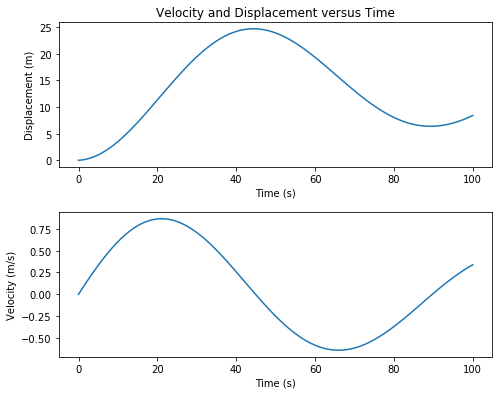

In [4]:
### YOUR Solutions Newman 5.1
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#INSERT YOUR SOLUTION HERE:



def f(time, velocityValues):
    """
    Description: a function that returns the value of a data set given the array number

    Parameters: time - array value used for searching data set
                velocityValues - data set 

    Return: value of data set at given index
    """
    return velocityValues[time]

dataSet = np.loadtxt ("velocities.txt", float)

timeValues  = dataSet[:,0]
velocityValues = dataSet[:,1]

N = len (timeValues) 
a = int (timeValues[0])
b = int (timeValues[N - 1])
h = 1

distanceTraveled = []

s = 0.5 * f(a, velocityValues) + 0.5 * f(b, velocityValues)
distanceTraveled.append (0)

for i in range (1, N):
    s += f (a + i * h, velocityValues)
    distanceTraveled.append (distanceTraveled[i - 1] + velocityValues[i] * h)

#CORRECTION - replaced reference to distance as displacement
#final position based upon trapezoidal approximation
print ("Total Displacement Traveled (by calculation):", s)

#final position based upon suming relative position with velocity multiplied by time step
#print ("Final position (by distanceTraveled[100]):", distanceTraveled[100])

#shows how the calculation for the total distance traveled matches up with the final value of the distanceTraveled data set
#plt.plot ([0, 101], [s,s], "k-")

#make the plot
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7, 5.6))

ax1.plot(timeValues, distanceTraveled)
ax1.set_ylabel("Displacement (m)")
ax1.set_xlabel("Time (s)")

ax2.plot(timeValues, velocityValues)
ax2.set_ylabel("Velocity (m/s)")
ax2.set_xlabel("Time (s)")

ax1.set_title("Velocity and Displacement versus Time")
plt.tight_layout()
#END CORRECTION

This graph shows an object's velocity (shown in the second plot) and position (shown in the first plot) over time. The objects position is based upon the amount of time that passes and the velocity of the object during that time. In this case we calculate the position of the object based upon the previous position plus the current velocity multiplied by the time between data points (one second). The final value of this distance is fairly close to the value determined by the trapezoidal method being 8.387578m while the trapezoidal approximation was 8.556232m. The trapezoidal integral approximation determined an approximate value for the area under the velocity versus time graph (or the distance traveled). The reason the integral of a velocity versus time graph is the distance is because
$v = \frac{dx}{dt}$, so

$\int v \ dt = \int dx$ or

$\int v \ dt = x$.

This means that instead of having to calculate the distance traveled by summing at each step we can instead simply calculate the integral or area under the curve of our velocity versus time graph.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - original problem.
-----------------------------------------------------------------------------------------------
Consider the integral
$$
E(x) = \int_0^x e^{-t^2} dt.
$$
1. Write a program to calculate $E(x)$ for values of $x$ from 0 to 3 in
  steps of 0.1.  Choose for yourself what method you will use for
  performing the integral and a suitable number of slices.
  
2. When you are convinced your program is working, extend it further to
  make a graph of $E(x)$ as a function of $x$.  If you want to remind
  yourself of how to make a graph, you should consult Section 3.1, starting
  on page 88.

Note that there is no known way to perform this particular integral
analytically, so numerical approaches are the only way forward.

-----------------------------------------------------------------------------------------------
### Newman Exercise 5.3 - notes and modifications.
-----------------------------------------------------------------------------------------------

The Gaussian integral does have analytic solutions in the limit from $-\infty$ to $\infty$.
It is a very usefull and famous integrals, and there are many fun ways to work 
out useful solutions.  For instance: 
$$
\int_{-\infty}^{\infty} e^{-t^2} dt = \sqrt{\pi}
$$
ref: https://en.wikipedia.org/wiki/Gaussian_integral

Calculate the Gaussian interval over an even interval (for instance a=-1, b=1) and check that you get the expected result under reasonable numerical approximations.  Check this for several intervals.  Calculate the percent difference between your value and the expected as the interval grows larger.  At when does your integral agree with the exact result within rounding error?  Make a table summarizing your work, and plot of $b$ vs. $error$ to show this.

Make a plot of the function $E(x)$ vs. $x$ along with the integral both for Newman's example and the additional question.

Point is to study approximation error until it becomes a rounding error. from -1 to 1 will be very off, but -10 to 10 will be better.
4 plots for this question

Accepted Value:  1.7724538509055159
Value for interval (-1, 1) : 1.492421592263499
Percent error: 15.799128338317715 %
Value for interval (-10, 10) : 1.772453850905517
Percent error: 6.263762659083975e-14 %
Value for interval (-20, 20) : 1.772453850905517
Percent error: 6.263762659083975e-14 %
Value for interval (-50, 50) : 1.7724538509055172
Percent error: 7.51651519090077e-14 %


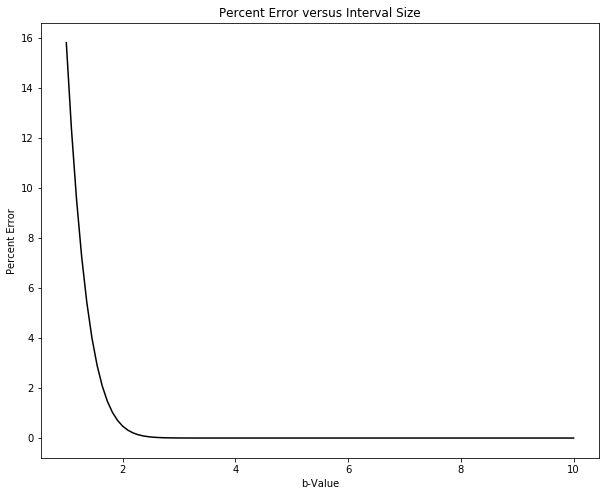

In [5]:
#If you sunk Lab 4 with the original repository,
#you'll find the file integrate.py
#this is a lesson in how you could write your own functions, store them in a file
#and treat that as a file you may import.
#notice that I can print the docstring - 
#you may do this for any python function that has a docstring

import integrate 
import math
import numpy as np
import pylab as plt

#print(help(integrate.integrate))

def gaussianFunction (x):
    """
    Description: returns the value of a gaussian function based upon the given independant value for the function

    Parameters: x - independant value for gaussian function

    Return: the value of a gaussian function evaluated at the given independant variable
    """
    return math.exp (-(x**2))

x1 = -1
x2 = 1
interval = (x1, x2)
step = 0.1
numSteps = int((x2 - x1) / step)
acceptedValue = math.sqrt (math.pi)

totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
percentError = abs (acceptedValue - totalIntegral) / acceptedValue * 100

print ("Accepted Value: ", acceptedValue)

#print (-1,1) approximation
print ("Value for interval", interval, ":", totalIntegral)
print ("Percent error:", percentError, "%")

x1 = -10
x2 = 10
interval = (x1, x2)
numSteps = int((x2 - x1) / step)
totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
percentError = abs (acceptedValue - totalIntegral) / acceptedValue * 100

#print (-10, 10) approximation
print ("Value for interval", interval, ":", totalIntegral)
print ("Percent error:", percentError, "%")

x1 = -20
x2 = 20
interval = (x1, x2)
numSteps = int((x2 - x1) / step)
totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
percentError = abs (acceptedValue - totalIntegral) / acceptedValue * 100

#print (-10, 10) approximation
print ("Value for interval", interval, ":", totalIntegral)
print ("Percent error:", percentError, "%")

x1 = -50
x2 = 50
interval = (x1, x2)
numSteps = int((x2 - x1) / step)
totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
percentError = abs (acceptedValue - totalIntegral) / acceptedValue * 100

#print (-10, 10) approximation
print ("Value for interval", interval, ":", totalIntegral)
print ("Percent error:", percentError, "%")

#assign initial values for interval width versus percent error
maxbValue = 10
bValues = np.linspace (1, maxbValue, 100)
errorValues = []

#calculate the percent error based upon the interval width
for b in bValues:
    x1 = -b
    x2 = b
    interval = (x1, x2)
    numSteps = int ((x2 - x1) / step)
    totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
    percentError = abs (acceptedValue - totalIntegral) / acceptedValue * 100
    errorValues.append (percentError)
    
#plot the %error versus interval size
plt.figure (figsize = (10, 8))
plt.plot(bValues, errorValues, "k-")
plt.ylabel("Percent Error")
plt.xlabel("b-Value")
plt.title("Percent Error versus Interval Size")

plt.show ()


This graph shows the decrease in the integration approximation value from the accepted value as we increase the domain over which we are integrating. Specifically we are integrating over a domain mirrored over the y-axis spanning by the amount 'b' in either direction. As we can see the error drastically decreases with an increase in our value for 'b', being well under 1% error by a b-value of 2.

Help on function integrate in module integrate:

integrate(f, interval, steps, order=1, float_type=<class 'float'>)
    Evaluate integral by Newton-Cotes rule (trapezoidal, Simpson's, etc.).
    
    f: function to integrate
    interval: tuple integration region (a,b)
    steps: number of integration steps (must be valid for order chosen)
    order (optional): integer order for integration (1..4)
    float_type: float type to which each term is converted before addition
    
    returns:
        total_integral (floating point number)
        x_array (1D np.array containing independent variable)
        I_array (1D np.array containing integrated values)

None


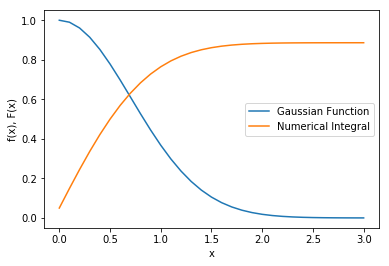

In [7]:
#CORRECTION - added extra plot didn't realise we needed

import integrate 
import math

def f (t):    
    '''Calculate the integrand of the Gaussian Integral'''
    I = math.exp(-t * t)
    return I

print(help (integrate.integrate))

a = 0.0
b = 3.0
h = 0.1
steps = int((b - a) / h)

integralAB, x, Fx = integrate.integrate(f, (a , b), steps)
fx = np.empty (steps+1)

for i in range(fx.size):
    fx[i] = f(x[i])
    
plt.plot (x, fx, label="Gaussian Function")
plt.plot (x, Fx, label="Numerical Integral")
plt.ylabel ("f(x), F(x)")
plt.xlabel ("x")
plt.legend ()

The two functions above are the gaussian function and the integral of the gaussian function. The integral of the gaussian function is a running sum of the area under the curve of the gaussian function, so it makes sense why the integral slope decreases as the gaussian function decreases to values close to zero.

END CORRECTION

In [7]:
#determine the point at which the calculated value is equal to the accepted value within rounding ~10^-16

ROUNDING = 10**(-14)

#set initial value will be checking
bValue = 20
step = 0.1
bValueStep = 10

#set accepted value
acceptedValue = math.sqrt (math.pi)

#calculate first difference
x1 = -bValue
x2 = bValue
interval = (x1, x2)
numSteps = int((x2 - x1) / step)
totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
error = abs (acceptedValue - totalIntegral)
bValue += bValueStep

#check if difference is less than or equal to rounding error amount
while ROUNDING <= error:
    x1 = -bValue
    x2 = bValue
    interval = (x1, x2)
    numSteps = int((x2 - x1) / step)
    totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)
    error = abs (acceptedValue - totalIntegral)
    bValue += bValueStep
    
print ("Interval value: (", -bValue, ",", bValue, ")")

Interval value: ( -30 , 30 )


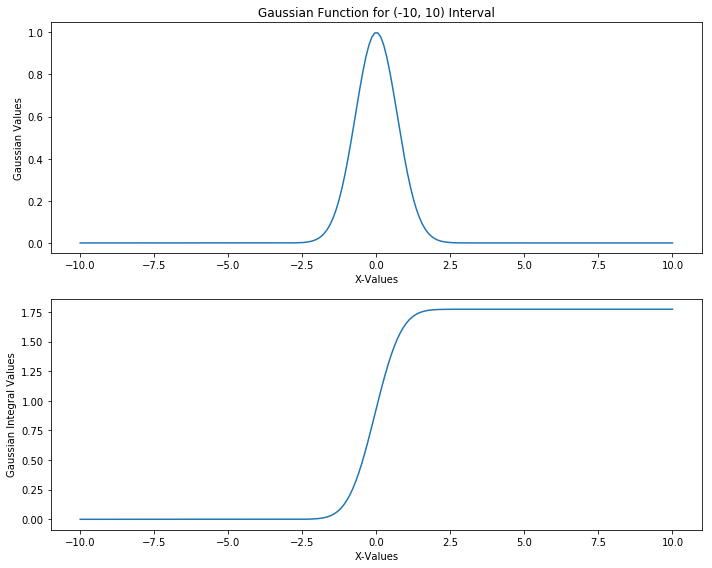

In [8]:
#Make a plot of the function  E(x)E(x)  vs.  xx  along with the integral both for Newman's example and the additional question.
import numpy as np

bValue = 10
step = 0.1
x1 = -bValue
x2 = bValue
interval = (x1, x2)
numSteps = int((x2 - x1) / step)

xValues = np.linspace (x1, x2, numSteps)
gaussianValues = []
gaussianIntegralValues = []

for x in xValues:
    #appen
    gaussianValues.append (gaussianFunction (x))

#plot the Gaussian function for (-10, 10)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

ax1.plot(xValues, gaussianValues)
ax1.set_ylabel("Gaussian Values")
ax1.set_xlabel("X-Values")

totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)

ax2.plot(xValues, integralValues)
ax2.set_ylabel("Gaussian Integral Values")
ax2.set_xlabel("X-Values")

ax1.set_title("Gaussian Function for (-10, 10) Interval")
plt.tight_layout()

The first subplot is of a normal gaussian function evaluated on the domain of (-10, 10). There is not a lot of magic going on in that plot, it is simply a function plot. The second plot allows for a little bit of analysis on the first plot. As we can see in the second plot it is only around the y-axis that the first plot has a value other than (nearly) zero. The flat lines in the second graph show that before about -2.5 and after 2.5 the gaussian function has values nearly zero.

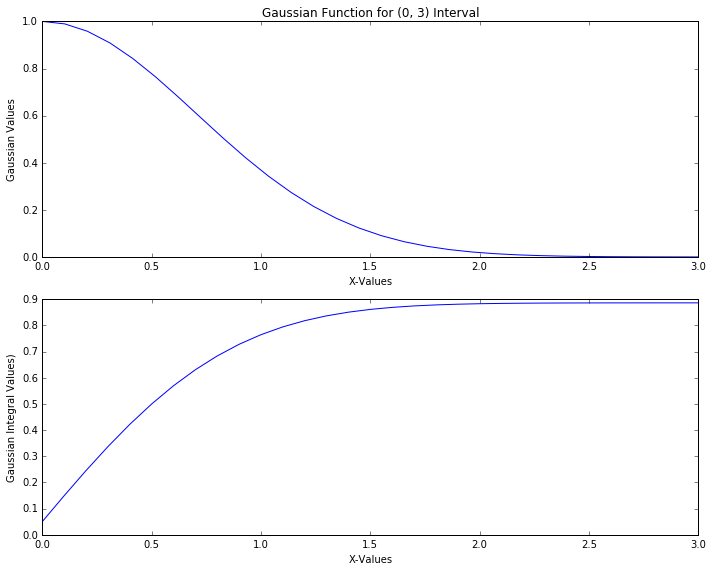

In [52]:
#Make a plot of the function  E(x)E(x)  vs.  xx  along with the integral both for Newman's example and the additional question.

x1 = 0
x2 = 3
step = 0.1
interval = (x1, x2)
numSteps = int((x2 - x1) / step)

xValues = np.linspace (x1, x2, numSteps)
gaussianValues = []

for x in xValues:
    #appen
    gaussianValues.append (gaussianFunction (x))

#plot the Gaussian function for (0, 3)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 8))

ax1.plot(xValues, gaussianValues)
ax1.set_ylabel("Gaussian Values")
ax1.set_xlabel("X-Values")

totalIntegral, xValues, integralValues = integrate.integrate (gaussianFunction, interval, numSteps)

ax2.plot(xValues, integralValues)
ax2.set_ylabel("Gaussian Integral Values)")
ax2.set_xlabel("X-Values")

ax1.set_title("Gaussian Function for (0, 3) Interval")
plt.tight_layout()

These two subplots again show the fact the gaussian function decreases to a value near zero after around 2.5. This can be seen fairly
clearly by both plots leveling off to having a slope near zero after around 2.5. 

### Newman Exercise 5.4: The diffraction limit of a telescope

Our ability to resolve detail in astronomical observations is
limited by the diffraction of light in our telescopes.  Light from stars
can be treated effectively as coming from a point source at infinity.  When
such light, with wavelength $\lambda$, passes through the circular aperture
of a telescope (which we'll assume to have unit radius) and is focused by
the telescope in the focal plane, it produces not a single dot, but a
circular diffraction pattern consisting of central spot surrounded by a
series of concentric rings.  The intensity of the light in this diffraction
pattern is given by
$$
I(r) = \biggl( {J_1(kr)\over kr} \biggr)^2,
$$
where $r$ is the distance in the focal plane from the center of the
diffraction pattern, $k=2\pi/\lambda$, and $J_1(x)$ is a Bessel function.
The Bessel functions $J_m(x)$ are given by
$$
J_m(x) = {1\over\pi} \int_0^\pi \cos(m\theta - x\sin\theta) ~d\theta,
$$
where $m$ is a nonnegative integer and $x\ge0$.
1. Write a Python function ```J(m,x)``` that calculates the value of
  $J_m(x)$ using Simpson's rule with $N=1000$ points.  Use your
  function in a program to make a plot, on a single graph, of the Bessel
  functions $J_0$, $J_1$, and $J_2$ as a function of $x$ from $x=0$ to
  $x=20$.
2. Make a second program that makes a density plot of the intensity of
   the circular diffraction pattern of a point light source with
   $\lambda=500$ nm, in a square region of the focal plane, using the
   formula given above.  Your picture should cover values of $r$ from zero
   up to about $1\,\mu$m.


*Hint 1:* You may find it useful to know that $\lim_{x\to0} J_1(x)/x = 1/2$.  

*Hint 2:* The central spot in the diffraction pattern is
so bright that it may be difficult to see the rings around it on the
computer screen.  If you run into this problem a simple way to deal with it
is to use one of the other color schemes for density plots described in
Section~3.3.  The ``hot`` scheme works well.  For a more
sophisticated solution to the problem, the ``imshow`` function has an
additional argument ``vmax`` that allows you to set the value that
corresponds to the brightest point in the plot.  For instance, if you say
``imshow(x,vmax=0.1)``, then elements in ``x`` with value 0.1, or
any greater value, will produce the brightest (most positive) color on the
screen.  By lowering the ``vmax`` value, you can reduce the total range
of values between the minimum and maximum brightness, and hence increase
the sensitivity of the plot, making subtle details visible.  (There is also
a ``vmin`` argument that can be used to set the value that corresponds
to the dimmest (most negative) color.)  For this exercise a value of
``vmax=0.01`` appears to work well.

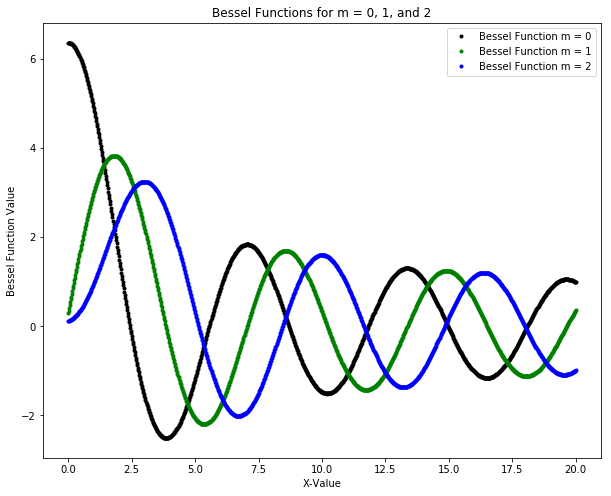

In [18]:
#DM I've written the Bessel function code to get you started
#but you need to figure out how to call it and use it
import pylab as plt
import numpy as np
%matplotlib inline

def J(m,x):
    """
    Description: returns the bessel function for the specified m-value at the specified x-value

    Parameters: m - nonnegative integer
                x - independant variable at which the bessel function is being evaluated

    Return: bessel function for the given m-value at the specified x-value
    """
    
    def f_theta(theta):
        func_arg = 1/math.pi * math.cos(m*theta - x*math.sin(theta))
        return func_arg         
        
    I = integrate.integrate(f_theta,(a,b),N,order=2)[0]
    
    return I


#######################################
#Part 1 - plotting the Bessel Function
#######################################
N = 1000
a = 0
b = 20

xValues = np.linspace (a, b, N)

besselFunc0 = []
besselFunc1 = []
besselFunc2 = []

for x in xValues:
    besselFunc0.append (J (0, x))
    besselFunc1.append (J (1, x))
    besselFunc2.append (J (2, x))

plt.figure (figsize = (10, 8))

plt.plot(xValues, besselFunc0, "k.", label="Bessel Function m = 0")
plt.plot(xValues, besselFunc1, "g.", label="Bessel Function m = 1")
plt.plot(xValues, besselFunc2, "b.", label="Bessel Function m = 2")
plt.legend ()
plt.xlabel ("X-Value")
plt.ylabel ("Bessel Function Value")
plt.title ("Bessel Functions for m = 0, 1, and 2")
plt.show ()

This shows the bessel functions on (0, 20) for values of 0, 1, and 2 for m. They appear to be decaying oscllitory functions, which would be consistent with their use in showing the diffraction pattern that can occur in light.

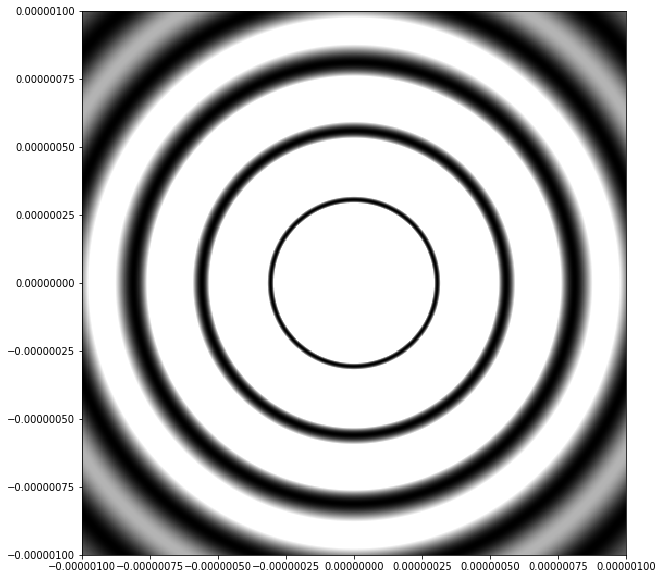

In [22]:
#I've given you some dimensions to get you started, 
# code up the diffraction pattern from here

import math

def intensity (radius, kValue):
    """
    Description: returns the intensity based upon the radius away from the mid point and the given kValue

    Parameters: radius - radial distance from centre
                kValue - $k=2\pi/\lambda$

    Return: the intensity value based upon the radius and k-value
    """
    return ((J (1, radius * kValue)) / (radius * kValue))**2

#########
#Part 2 - plotting the diffraction pattern
#########
lambda1 = 500e-9          #500 nm
k = 2.0 * math.pi / lambda1   
x_max=1e-6                #1 micron - make this the the approximate scale of your problem

N = 500
xyGrid = np.empty ([N, N], float)
xValues = np.linspace (-x_max, x_max, N)
yValues = np.linspace (-x_max, x_max, N)

for n in range (len (xValues)):
    for m in range (len (yValues)):
        x = xValues[n]
        y = yValues[m]
        xyGrid[n][m] = intensity (math.sqrt (x**2 + y**2), k)
        

plt.figure (figsize = (10, 10))
plt.imshow (xyGrid, origin = "lower", extent = [-x_max, x_max, -x_max, x_max], vmax=0.01, cmap='gray')

CORRECTION - changed "hue" to "value" since changed image to grey scale  
This is a defraction pattern showing light intensity based upon colour value. Physically this suggests light is a wave, 
since this is a property of waves.   
END CORRECTION

CORRECTION - added more decriptions  
The physics of this are that the amount of light to show up in each area is based upon the superposition of the light wave present at that location. As a result of light being a wave there can be constructive and deconstructive interferance that results in light and dark regions respectivly.  
END CORRECTION